# Tutorial 3: Gray-scale image processing

In this tutorial we focus on gray-scale image processing. Often in gray scale images all information you are looking for is included. Moreover, gray-scale images are easy to handle and many techniques are easily illustrated. In this tutorial we will focus on four techniques. 1) Histograms and histogram equalization, these gives you inside on how the pixel intensities are distributed over your image and enables you to make the image more *sharp* , 2) manual thresholding, for instance useful for separating foreground and background on an image, 3) morphological operators, which are simple but powerful tools to remove holes and/or noise from your image, and 4) contour finding to cut out objects from an image.

As always, we start with packages we need and defining some functions displaying our results. Please evaluate the two cells below.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# A function to show a gray-scale image with its histogram side-by-side
def show_im_and_hist(originalImage, hist):
    plt.figure(figsize=(15,8))                              #set figure size and create 
    plt.subplot(121)
    plt.imshow(originalImage, cmap='gray')
    plt.xticks([]), plt.yticks([]
                              )
    plt.title('Image')

    plt.subplot(122)
    plt.bar(list(range(len(hist))),hist[:,0])                # Plot the histogram as a bar plot
    plt.title('histogram')
    plt.xlabel("Intensity"), plt.ylabel("count")
    plt.show()
    
#Function to show one or multiple images
def show_images(images):
    figwidth = 20; figheight = figwidth * images[0][0].shape[0]/images[0][0].shape[1]
    plt.figure(figsize=(figwidth,figheight))
    cols = 2
    rows = len(images) // 2 + 1
    for i, image in enumerate(images):
        plt.subplot(rows,cols,i+1)
        plt.imshow(image[0], cmap='gray', vmin=0, vmax=255)
        plt.title(str(image[1]))
        plt.xticks([]), plt.yticks([])
    plt.show()
    
# Function to show an RGB image
def imshow_rgb(img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

---
## Histograms
---

Image histograms describe the distribution of intensity values in an image. In a gray scale image each pixel is a number between $0$ and $255$. In each bin in the histogram the number of occurrences of a number is collected.

Here, we will use gray-scale images to calculate the histogram. In the next tutorial, we will also look at color histograms. We start with loading an image of a cabbage and plot the histogram.

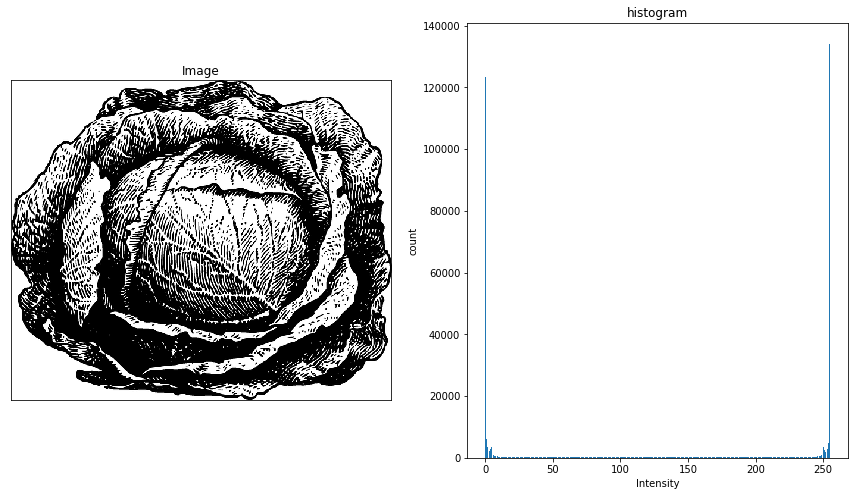

In [4]:
img = cv2.imread('Data_Tutorial3/kool.png',0)#load image

nr_of_bins = 256             # The number of bins in the histogram   
intensity_range = [0,256]    # The range of intensities captured in the histogram
hist = cv2.calcHist([img],[0],None,[nr_of_bins],intensity_range)  #apply histogram
show_im_and_hist(img,hist)                         #call function to show image and histogram

**Excercise (intensity histograms):**
- What does the histogram tell you about the distribution of intensity values in the image? Do you see that in the image?

Let's look at an image with more variation in intensities:

In [ ]:
imgCrowd = cv2.imread('Data_Tutorial3/crowd.png',0)   #load image
hist = cv2.calcHist([imgCrowd],[0],None,[256],[0,256])#create histogram
show_im_and_hist(imgCrowd,hist)                       #call function to show both image and histogram

**Exercise (histogram meaning):**
- What does the histogram tell you about the image?

__Exercise (brightening):__
* Run the code below and adapt it to make a __brighter__ version of the image using multiplication by 2.
* Run the code again, this time making a __darker__ version by multiplication with 0.5.

Hint: Use cv2.multiply

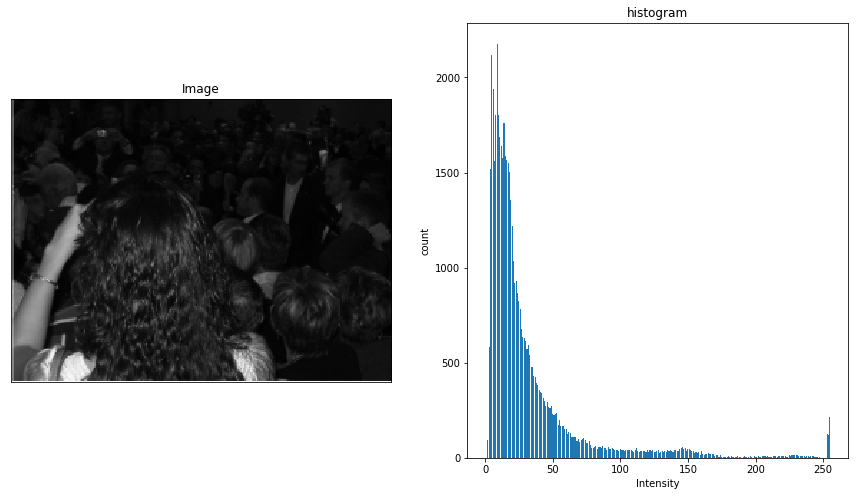

In [5]:
imgCrowd = cv2.imread('Data_Tutorial3/crowd.png',0)   #load image
hist = cv2.calcHist([imgCrowd],[0],None,[256],[0,256])#create histogram
show_im_and_hist(imgCrowd,hist)                       #call function to show both image and histogram

In [ ]:
# SOLUTION

imgCrowd_bright = cv2.multiply(imgCrowd, 2)
hist_bright = cv2.calcHist([imgCrowd_bright],[0],None,[256],[0,256])#create histogram
show_im_and_hist(imgCrowd_bright,hist_bright)                       #call function to show both image and histogram

imgCrowd_bright = cv2.multiply(imgCrowd, 0.5)
hist_bright = cv2.calcHist([imgCrowd_bright],[0],None,[256],[0,256])#create histogram
show_im_and_hist(imgCrowd_bright,hist_bright)                       #call function to show both image and histogram

__Exercise (histogram boundaries):__
    
1. When you brightened the previous image, why did this create the large spike on the righthand side of the histogram?
2. When you lowered the brightness of the image, why is there a small spike around the middle of the histogram? What does this say about the original image?
3. Are these spikes at the histogram edges good or bad? Motivate your answer.

---
## Historgram equalization
---

As you can see that the above histgrams are not very equalized. That is, the histogram is far from a uniform distribution. __Histogram equalization__ is a method to distribute the intensities more equally. The figure below shows het idea behind histogram equalization.
<img src="Data_Tutorial3/histogram_equalization.png" />

Histogram equalization of an image can be performed by the function `cv2.equalizeHist`:

In [ ]:
imgCrowd = cv2.imread('Data_Tutorial3/Crowd.png',0) #load image
imgCrowd_eq = cv2.equalizeHist(imgCrowd)            # apply histogram equalization

# calculate the histograms of the original and equalized image
hist = cv2.calcHist([imgCrowd],[0],None,[256],[0,256])           #calculate histogram
hist_eq = cv2.calcHist([imgCrowd_eq],[0],None,[256],[0,256])     #calculate histogram

print("Original image")
show_im_and_hist(imgCrowd, hist)
print("Histogram-equalized image")
show_im_and_hist(imgCrowd_eq, hist_eq)

__Exercise (histogram equalization changes):__
* Explain the difference between the histogram-equalized image/histogram and the original.

We will now load two different images of the same scene with different brightness:

In [ ]:
imgCrowdDark = cv2.imread('Data_Tutorial3/crowd.png',0)
imgCrowdBright = cv2.imread('Data_Tutorial3/crowdLight.png',0) 

show_images([(imgCrowdDark, "Original dark image"), (imgCrowdBright, "Original bright image")])

__Excercise (histogram equalization dark/bright):__
- Perform histogram equalization on both images (dark and bright) and show the resulting histogram-equalized images
- What is the result?

In [ ]:
# Add your code to perform histogram equalization on imgCrowdDark and imgCrowdBright 
#and show the results
imgCrowdDark_eq = ___            #apply histogram equalization
imgCrowdBright_eq = ___            #apply histogram equalization

show_images([(imgCrowdDark, "Original dark image"), (imgCrowdBright, "Original bright image"),
            (imgCrowdDark_eq, "Eq dark image"), (imgCrowdBright_eq, "Eq bright image")])

In [ ]:
#Solution
imgCrowdDark_eq = cv2.equalizeHist(imgCrowdDark)            #apply histogram equalization
imgCrowdBright_eq = cv2.equalizeHist(imgCrowdBright)           #apply histogram equalization

show_images([(imgCrowdDark, "Original dark image"), (imgCrowdBright, "Original bright image"),
            (imgCrowdDark_eq, "Eq dark image"), (imgCrowdBright_eq, "Eq bright image")])

---
## Simple thresholding
---

Using a histogram, we can select a threshold to segment an image in foreground and background. In the following code, we will load an gray-scale image. We want to segment the bird from the rest of the image.

__Exercise (threshold choice):__
* Look at the image and at the histogram. Which intensities belong to the bird? Which to the sky?
* Look at the histogram. What would be a good threshold for segmenting the image into dark and bright parts?

In [ ]:
#get the image and the histogram
img = cv2.imread("Data_Tutorial3/kraai.png",0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Show the image
plt.figure(figsize=(15,8))                              #set figure size and create 
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('Image')

# Show histogram and zoom in on intensities 0-170, where most of the intensity values are
ax = plt.subplot(122)
plt.bar(list(range(len(hist))),hist[:,0])                # Plot the histogram as a bar plot
ax.set_xlim([0, 170])
plt.title('histogram')
plt.xlabel("Intensity"), plt.ylabel("count")
plt.show()

To segment the image using the threshold, we can use the function `cv2.threshold`. In Tutorial 5, we will look into the topic of image segmentation in more detail. Here we apply a simple thresholding function. 

The code below opens a widget with a slider with which you can set the threshold. 

__Exercise (interactive threshold choice):__
* Apply the threshold that you selected in the previous exercise and see if you can segment the crow from the background. Adapt the threshold if needed. 

__NB__. A perfect segmentation will not be possible because the tree contains dark pixels as well. We will solve that later.

In [ ]:
from IPython import display     # Library for Jupyter notebooks
from ipywidgets import *        # Include ipywidgets to add some controls to the code

img = cv2.imread("Data_Tutorial3/kraai.png",0)
thr_widget = IntSlider(description='Threshold [0,255]',min=0, max=255, step=5, layout={'width': '800px'})

def segmentImage(threshold):
    # Perform the thresholding. 
    #cv2.THRESH_BINARY_INV ensures that the pixels darker than threshold become the foreground
    ret, imgThreshold = cv2.threshold(img, threshold, 256, cv2.THRESH_BINARY_INV)
    show_images([[img,"original"], [imgThreshold,"threshold applied"]] )

thr_widget.value = 130
interact(segmentImage, threshold=thr_widget)

The result of thresholding is often called an __image mask__ or simply __mask__.

---
## Morphological  operators: erosion and dilation
---

As you have seen, thresholding the crow image was not perfect. We can see two types of errors; (1) not all pixels on the crow are segmented as foregound, and (2) some pixels in the background are selected as foreground.

To  improve the crow mask, we can use morphological operators. There are two basic operators; erosion and dilation:
* if we apply __erosion__,  we take away pixels of the border of the mask, that is, we shrink the mask,
* if we apply __dilation__, add pixels at the border of the mask, that is, we to grow the mask.

<table>
<tr>
<td><img src="Data_Tutorial3/dilation-erosion.png"></td>
</tr>
<tr><td><center>The original mask and the effects of dilation and erosion.</center></td></tr> 
</table>

On a bigger picture you the fattening and shrinking effect of the two operations.

<table>
<tr>
<td><img src="Data_Tutorial3/imageED.png"></td>
<td><img src="Data_Tutorial3/erosion.png"></td>
<td><img src="Data_Tutorial3/dilation.png"></td>
</tr>
<tr><td><center>Original mask</center></td><td><center>Applying erosion</center></td><td><center>Applying dilation</center></td></tr> 
</table>


__Exercise (erosion and dilation):__
- Look again at the results of thresholding the crow image. How could we reduce the two types of errors using subsequently  morphological erosion and dilation? For instance, first dilating 2 times and then eroding once.


We will now apply morphological erosion and dilation to our crow image and look at the results:

1. Run the code as is and describe what you see
2. Add some code to perform dilation as well and show the results. Describe the results.

Remark: dilation and erosion are actually implemented as convolution in open cv. That is why there is a structuring element included. The size of the element indicates how often dilation and erosion is performed. 

In [ ]:
# Load the image and apply the threshold
imgCrow = cv2.imread("Data_Tutorial3/kraai.png",0)
threshold = 80
ret, maskCrow = cv2.threshold(imgCrow, threshold,256, cv2.THRESH_BINARY_INV)

# Create a 7x7 structuring element. 
strel = np.ones((7,7),np.uint8)  

# Apply erosion (1x) to the thresholded image
maskCrowErosion = cv2.erode(maskCrow, strel) 

# Apply dilation (1x) to the thresholded image
maskCrowDelation = cv2.imread("Data_Tutorial3/problems.jpg",0) #change this to your own code.

#solution:
#maskCrowDelation = cv2.dilate(maskCrow,strel)


# Show the image
show_images([(imgCrow,"Original image"),(maskCrow,"Thresholded image"),
            (maskCrowErosion,"Using erosion"),(maskCrowDelation,"Using Delation")])


---
## Morphological  operators: opening and closing
---

The result of erosion is that the mask becomes smaller and the result of dilation is that the mask becomes larger. That is not always desired. To compensate for it, we can apply erosion after dilation, or the other way around:

1. $M' = \text{dilate}(\text{erode}(M))$ or
2. $M' = \text{erode}(\text{dilate}(M))$ or

You can find the first option in the code below.

__Exercise (opening and closing):__
* Add code to apply and show the second version as well
* Describe the differences in output

In [ ]:
# Create a structuring element 
strel = np.ones((5,5),np.uint8) 

# Apply option 1: M' = dilate(erode(M))
maskCrow2 = cv2.dilate( cv2.erode(maskCrow, strel), strel)

show_images([ (maskCrow,"Original mask, M"), (maskCrow2,"dilate(erode(M))") ])

The two sequences that we applied are called __morphological opening__ and __morphological closing__:

1. __Opening:__ $M' = \text{dilate}(\text{erode}(M))$ 
2. __Closing:__ $M' = \text{erode}(\text{dilate}(M))$

With opening, you can __remove noise in the background__. With closing, you close the mask, that is, __remove noise in the foreground__.

Opening and closing can be performed as we did above, but there is also a OpenCV function to do it for us, called `cv2.morphologyEx`, where as operator, we can pass `cv2.MORPH_OPEN` or `cv2.MORPH_CLOSE`.

Also opening and closing can be performed in sequence, first closing then opening, or the other way around. The first option is implemented in the code below

__Exercise (combined opening and closing):__
* Program the second option as well and show the results
* Look to the output and describe the difference. What are the advantages and disadvantages of the methods used? 
* You don't need to use the same structering element when eroding and closing. Try first eroding with a larger element followed by eroding and vice versa. Describe what you observe. 

In [ ]:
# Create a structuring element 
strel = np.ones((5,5),np.uint8) 

# Apply opening and closing separately on the original mask
maskCrowOpening = cv2.morphologyEx(maskCrow, cv2.MORPH_OPEN, strel)
maskCrowClosing = cv2.morphologyEx(maskCrow, cv2.MORPH_CLOSE, strel)

# Apply first opening, then closing
maskCrowOpenClose = cv2.morphologyEx( cv2.morphologyEx(maskCrow, cv2.MORPH_OPEN, strel), 
                                     cv2.MORPH_CLOSE, strel)
# Apply first closing, then opening
# Add your code here...
## SOLUTION STARTS
maskCrowCloseOpen = cv2.morphologyEx( cv2.morphologyEx(maskCrow, cv2.MORPH_CLOSE, strel), 
                                     cv2.MORPH_OPEN, strel)
## SOLUTION ENDS

# Show all results
show_images([ (maskCrow,"Original mask"), (maskCrowOpening,"opening"), (maskCrowClosing,"closing"),
            (maskCrowOpenClose,"closing(opening(M))"), (maskCrowCloseOpen, "closing(opening(M))")])

__Exercise (advantages and disadvantages):__
 - Look to the output and describe the difference. What are the advantages and disadvantages of the methods used? 

---
## Connected components
---
As you can see, the opening(closing($M$)) operation gives a pretty good result, but still not perfect: part of the twig is still visible and the bird mask still contains some holes. To keep only the bird and fill the holes, we can use a different approach by detecting all the __connected components__ in the mask. A connected component is a connected group of pixels in the mask.

Connected-component analysis can be done in openCV using the functoin `cv2.findContours(...)`. The function finds all connected components and returns the contour of that connected component. The method can return only the outer contour, or also the inner contours (that is, the contours of the holes in the connected component). In this case, we want to ignore the holes, so we are interested in the external contours. The code below performs the connected-component analysis and displays the detected outer contours on the mask: 

In [ ]:
#the image from above
maskCrowCloseOpen = cv2.morphologyEx( cv2.morphologyEx(maskCrow, cv2.MORPH_CLOSE, strel), 
                                     cv2.MORPH_OPEN, strel)

# Detect all connected components and return the external contours of the connect.
# Do not approximate the contour, but return all contour points
im2, contours, hierarchy = cv2.findContours(maskCrowCloseOpen,cv2.RETR_EXTERNAL,
                                            cv2.CHAIN_APPROX_NONE)

# Make a copy of the mask, make it a color image and plot all detected external contours
img_show = cv2.cvtColor(maskCrowCloseOpen, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    r = int(np.random.random() * 256)
    g = int(np.random.random() * 256)
    b = int(np.random.random() * 256)
    cv2.drawContours(img_show, [cnt], -1, (b, g, r), 2)
    
plt.figure(figsize=(10,10))
imshow_rgb(img_show)
plt.xticks([]),plt.yticks([])
plt.show()

Using the detected contours, we can calculate the size of each connected component (ignoring the holes) with the function `cv2.contourArea(...)` to select only the largest connected component (our bird):

In [ ]:
# Calculate area for each detected contour and add it to a tuple containing the contour points and the size
contour_sizes = [(contour, cv2.contourArea(contour)) for contour in contours]

# Find the contour with largest area 
max_contour_size = max(contour_sizes, key=lambda x: x[1])

# max_contour_size is a tuple containing the list of contour points and the area (in pixels)
bird_contour = max_contour_size[0]
bird_area_px = max_contour_size[1]

# Plot only the bird contour
img_show = cv2.cvtColor(maskCrowCloseOpen, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_show, [bird_contour], -1, (0, 0, 255), 2)
# Calculate the center of the contour using moments
M = cv2.moments(cnt)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
# Plot text with the size of the bird area
cv2.putText(img_show, "%d px" % bird_area_px, (cX-50,cY), 1, 1, (0,0,255), 1)
plt.figure(figsize=(10,10))
imshow_rgb(img_show)
plt.show()

We can also use the `drawContours` function to produce a filled mask from a given contour.

In [ ]:
contourMask = np.zeros_like(maskCrowCloseOpen)

cv2.drawContours(contourMask, [bird_contour], 0, 255, cv2.FILLED)

show_images([(contourMask, "Bird Mask")])

Not bad at all :)

---
## More morphological operations 
---

Morphological operations can be used to find the inner and outer gradient (or edge) of objects:
* __Inner:__ $M - \text{erode}(M)$
* __Outer:__ $\text{dilate}(M) - M$

__Excercise 14:__
* Take the best mask of the bird from the previous exercises. Show the inner and the outer gradient (edge)

In [ ]:
## Add your code

strel = np.ones((5,5),np.uint8) 
innerEdge = __
outerEdge = __

show_images([ (maskCrowCloseOpen,"Mask"), (innerEdge,"Inner edge"), (outerEdge,"Outer edge")])


In [ ]:

## SOLUTION STARTS

strel = np.ones((5,5),np.uint8) 
innerEdge = maskCrowCloseOpen - cv2.erode(maskCrowCloseOpen, strel)
outerEdge = cv2.dilate(maskCrowCloseOpen, strel) - maskCrowCloseOpen

show_images([ (maskCrowCloseOpen,"Mask"), (innerEdge,"Inner edge"), (outerEdge,"Outer edge")])

Dilation and erosion can also be applied to gray-scale images. In that case, we are dealing with order-statistical filters, similar to the median filter. For __dilation__, the __maximum__ value of all pixels in the local neighborhood are taken and for __erosion__ the __minimum__ value.

__Exercise (grayscale images):__
* Apply erosion and dilation to a gray scale image. Describe the results

In [ ]:
imgCrow = cv2.imread("Data_Tutorial3/kraai.png",0)

# Create a structuring element 
strel = np.ones((5,5),np.uint8) 

# Erode
imgCrowErode = cv2.erode(imgCrow, strel)
imgCrowDilate = cv2.dilate(imgCrow, strel)

show_images([ (imgCrow,"Original image"), (imgCrowErode,"eroded"), (imgCrowDilate,"dilated")])